In [35]:
import pandas as pd
data = pd.read_csv('C:\\Users\\dglee\Desktop\\AAPL.csv')

In [36]:
data.shape

(4799, 7)

In [37]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,0.936384,1.004464,0.907924,0.999442,0.863657,535796800
1,2000-01-04,0.966518,0.987723,0.903460,0.915179,0.790842,512377600
2,2000-01-05,0.926339,0.987165,0.919643,0.928571,0.802415,778321600
3,2000-01-06,0.947545,0.955357,0.848214,0.848214,0.732975,767972800
4,2000-01-07,0.861607,0.901786,0.852679,0.888393,0.767695,460734400


In [38]:
#Check for missing values
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [39]:
from datetime import datetime
data['Date']=pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
#check datatype of index
data.index

DatetimeIndex(['2000-01-03', '2000-01-04', '2000-01-05', '2000-01-06',
               '2000-01-07', '2000-01-10', '2000-01-11', '2000-01-12',
               '2000-01-13', '2000-01-14',
               ...
               '2019-01-16', '2019-01-17', '2019-01-18', '2019-01-22',
               '2019-01-23', '2019-01-24', '2019-01-25', '2019-01-28',
               '2019-01-29', '2019-01-30'],
              dtype='datetime64[ns]', name='Date', length=4799, freq=None)

In [40]:
data['year'] = data.index.year
data['month'] = data.index.month
data['day'] = data.index.day

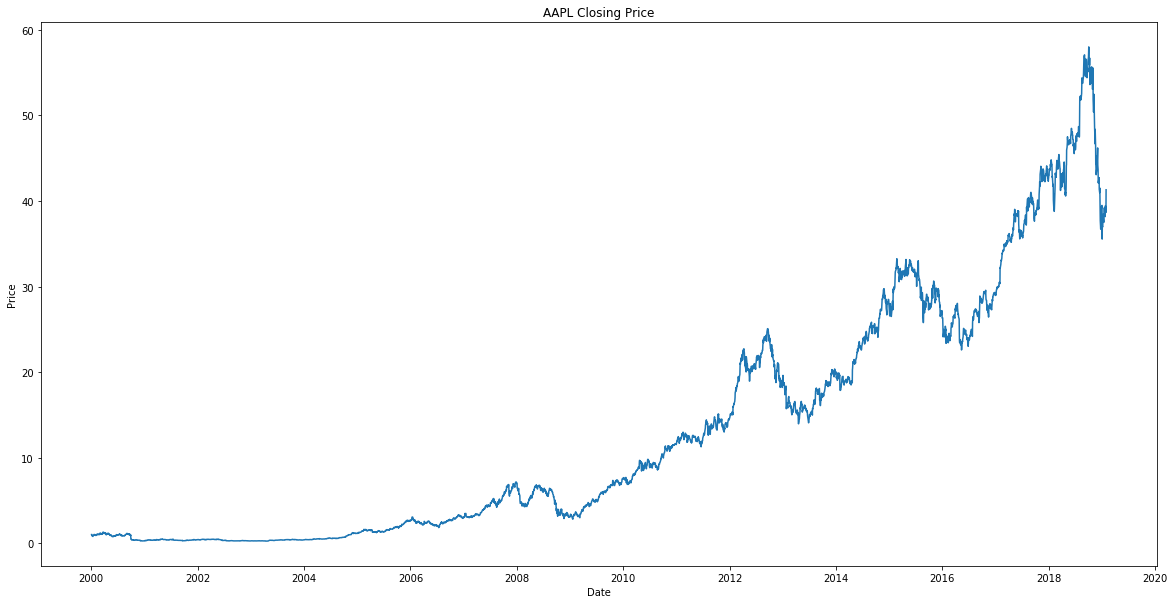

In [41]:
# plot stock closing price 
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
plt.figure(figsize=(20,10))
plt.plot(data['Close'])
plt.title("AAPL Closing Price")
plt.xlabel('Date')
plt.ylabel('Price')

plt.show()

In [42]:
# Split train and test data
data_train, data_test = data[:3800], data[3800:]

In [43]:
# Apply ADF test to test stationarity
from statsmodels.tsa.stattools import adfuller
X_train = data_train['Close']
results = adfuller(X_train.values)

In [44]:
print('Test Statistics: %f' %results[0])
print('p-value:%f' %results[1])
print('Critical Values:')
for key, value in results[4].items():
    print('\t%s: %.2f' %(key, value))

Test Statistics: 2.194391
p-value:0.998878
Critical Values:
	1%: -3.43
	5%: -2.86
	10%: -2.57


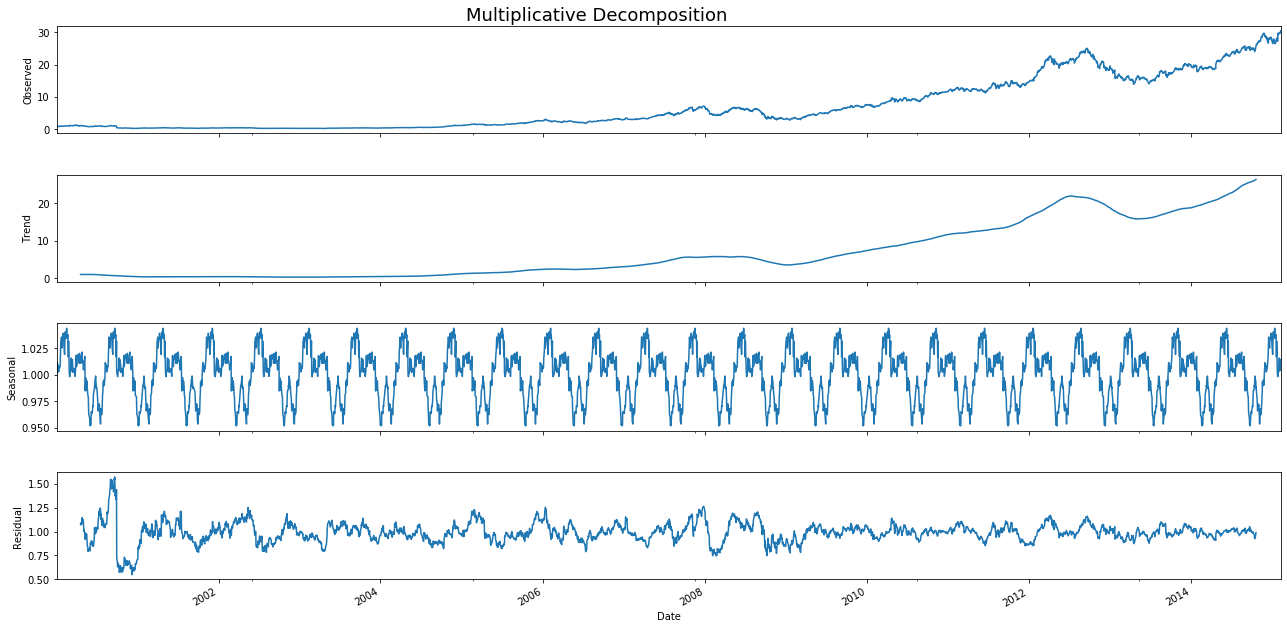

In [91]:
## Since Test Statistics > Critical Values and p-value > 0.05 we reject Ha 
## and infer series is not stationary
#  Decompose data to trend and seasonality 

# Multiplicative Decomposition
mul_decomp = seasonal_decompose(X_train, model = 'multiplicative', freq = 150)
fig = mul_decomp.plot()
fig.suptitle('Multiplicative Decomposition', fontsize = 18)
fig.set_size_inches(20, 10)
plt.show()

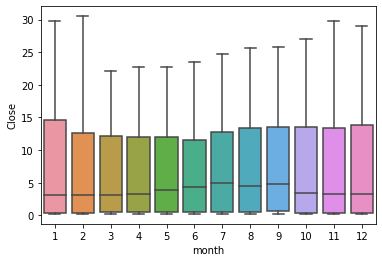

In [53]:
# Seasonality boxplot
import seaborn as sns
sns.boxplot(x = data['month'], y = X_train)

In [12]:
# Apply log to series
import numpy as np
log_X = np.log(X_train)
results_log = adfuller(log_X)
print('Test Statistics: %f' %results_log[0])
print('p-value:%f' %results_log[1])
print('Critical Values:')
for key, value in results_log[4].items():
    print('\t%s: %.2f' %(key, value))

Test Statistics: 0.087144
p-value:0.965172
Critical Values:
	1%: -3.43
	5%: -2.86
	10%: -2.57


In [13]:
# Differencing series 
diff_X = log_X.diff(1).fillna(0)
results_diff = adfuller(diff_X)
print('Test Statistics: %f' %results_diff[0])
print('p-value:%f' %results_diff[1])
print('Critical Values:')
for key, value in results_diff[4].items():
    print('\t%s: %.2f' %(key, value))

Test Statistics: -13.138239
p-value:0.000000
Critical Values:
	1%: -3.43
	5%: -2.86
	10%: -2.57


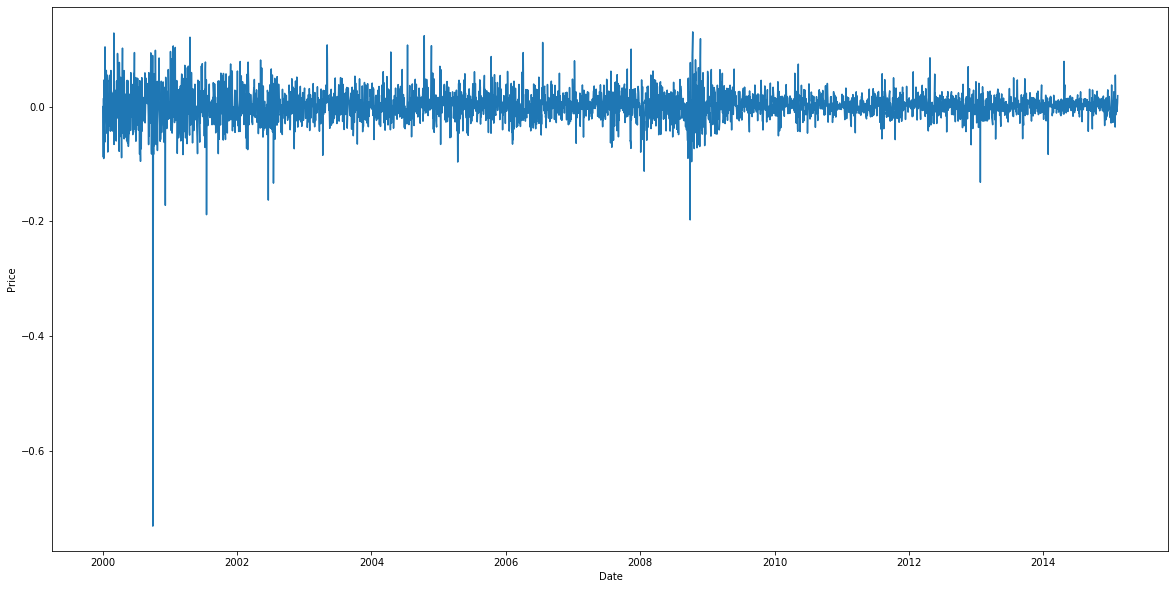

In [14]:
plt.figure(figsize=(20,10))
plt.plot(diff_X)
#plt.title("TSLA Closing Price")
plt.xlabel('Date')
plt.ylabel('Price')

plt.show()

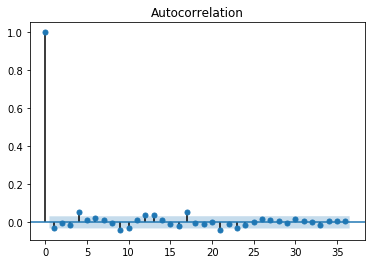

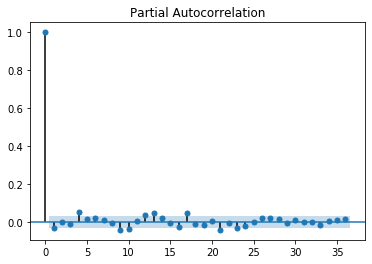

In [54]:
# Use ACF and PACF to measure correlation
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(diff_X)
plot_pacf(diff_X)
plt.show()

In [95]:
import pmdarima as pm
model_ARIMA = pm.auto_arima(X_train, trace = True, 
                              error_action = 'ignore', 
                              suppress_warnings = True)
print(model_ARIMA.summary())

Fit ARIMA: order=(2, 2, 2) seasonal_order=(0, 0, 0, 1); AIC=-2156.702, BIC=-2119.249, Fit time=5.377 seconds
Fit ARIMA: order=(0, 2, 0) seasonal_order=(0, 0, 0, 1); AIC=386.650, BIC=399.134, Fit time=0.431 seconds
Fit ARIMA: order=(1, 2, 0) seasonal_order=(0, 0, 0, 1); AIC=-598.282, BIC=-579.556, Fit time=0.296 seconds
Fit ARIMA: order=(0, 2, 1) seasonal_order=(0, 0, 0, 1); AIC=-2161.743, BIC=-2143.016, Fit time=2.143 seconds
Fit ARIMA: order=(1, 2, 1) seasonal_order=(0, 0, 0, 1); AIC=-2160.532, BIC=-2135.563, Fit time=4.952 seconds
Fit ARIMA: order=(0, 2, 2) seasonal_order=(0, 0, 0, 1); AIC=-2160.354, BIC=-2135.385, Fit time=3.297 seconds
Fit ARIMA: order=(1, 2, 2) seasonal_order=(0, 0, 0, 1); AIC=-2158.326, BIC=-2127.115, Fit time=3.209 seconds
Total fit time: 19.713 seconds
                           Statespace Model Results                           
Dep. Variable:                      y   No. Observations:                 3800
Model:               SARIMAX(0, 2, 1)   Log Likelihood

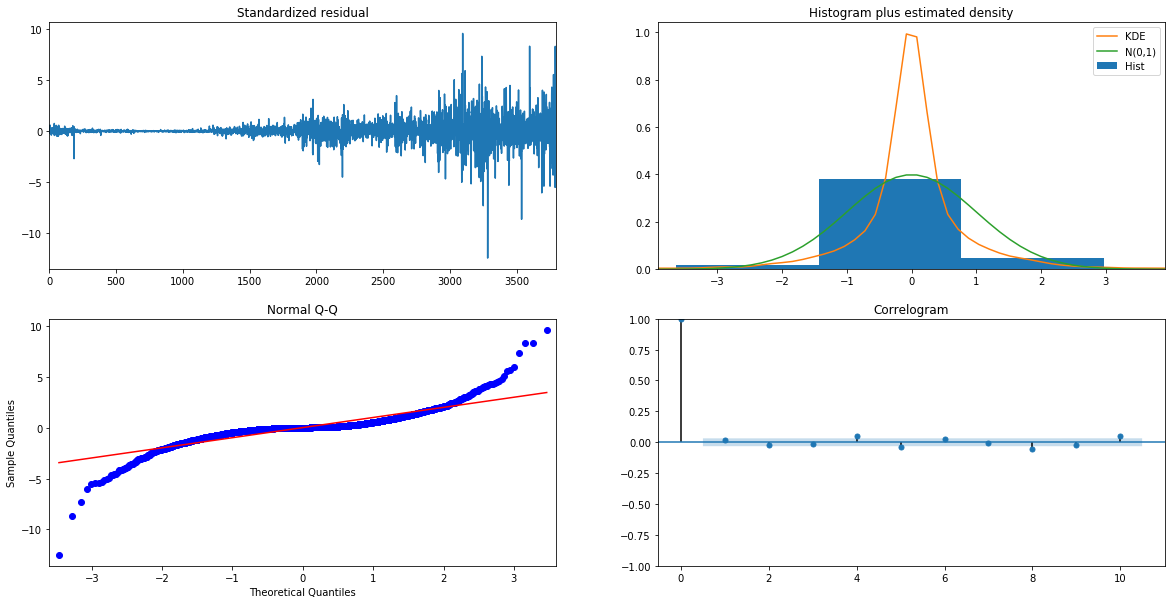

In [97]:
model_ARIMA.plot_diagnostics(figsize=(20,10))
plt.show()

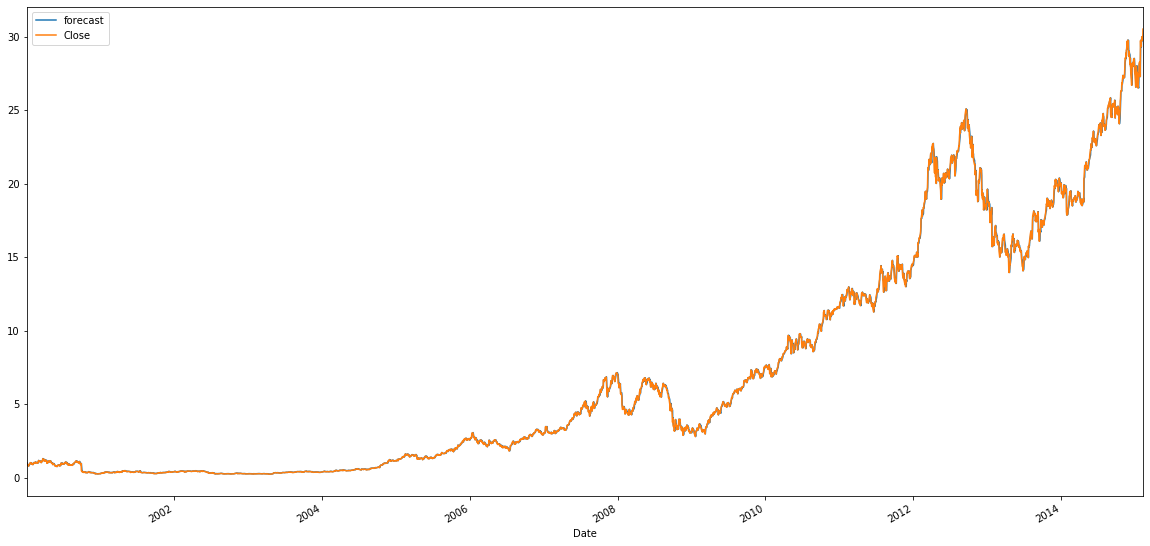

In [92]:
# Actual vs fitted
fig = model_result.plot_predict()
fig.set_size_inches(20, 10)
plt.show()

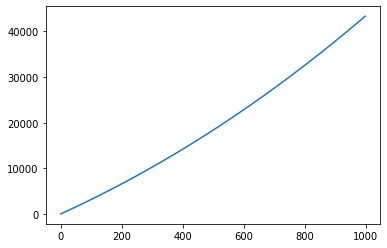

In [201]:
pred, CI = model_ARIMA.predict(n_periods=999, return_conf_int=True)
plt.plot(pred.cumsum())

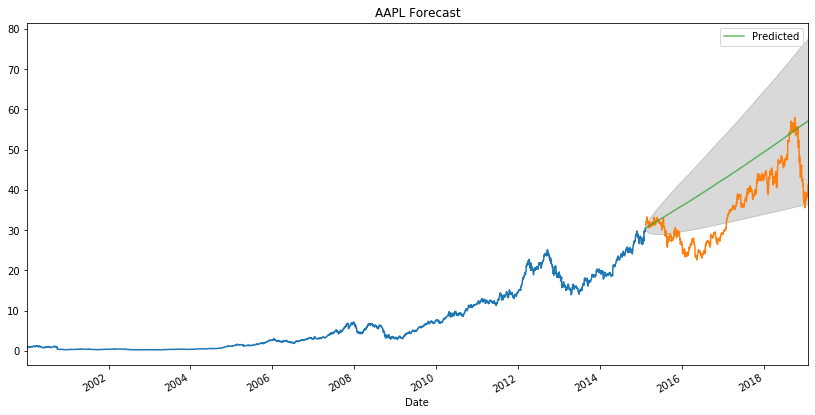

In [205]:
CI_data = pd.DataFrame(data = CI , index = data_test.index, 
                        columns = ['Lower CI', 'Upper CI'])
pred = pd.DataFrame(data = pred, index = data_test.index, columns = ['Predicted'])

ax = X_train.plot(label = '')
data_test['Close'].plot(label = 'Observed')
pred.plot(ax=ax, label='Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(CI_data.index, 
                 CI_data.iloc[:, 0], 
                 CI_data.iloc[:, 1], 
                 color='k', alpha=.15)

plt.title('AAPL Forecast')
plt.show()

In [228]:
mse = ((pred.subtract(data_test['Close'], axis = 0))** 2).mean()
rmse = np.sqrt(mse)
print('Mean Squared Error: %f' %round(mse, 3))
print('Root Mean Squared Error: %f' %round(rmse, 3))

Mean Squared Error: 86.686000
Root Mean Squared Error: 9.311000
